### Load Required Libraries
First, let's import the necessary libraries for our analysis.

In [1]:
from skimage import io, filters, measure, morphology, segmentation, color, feature
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np
import pandas as pd

### Load the Image
Let's load the image from the data directory into our notebook.

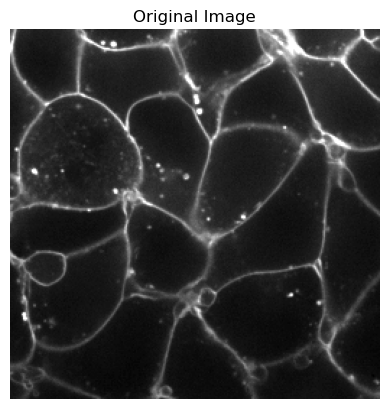

In [2]:
image = io.imread('../data/membranes.png')
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Grayscale Conversion
Convert the image to grayscale if it is in RGB format.

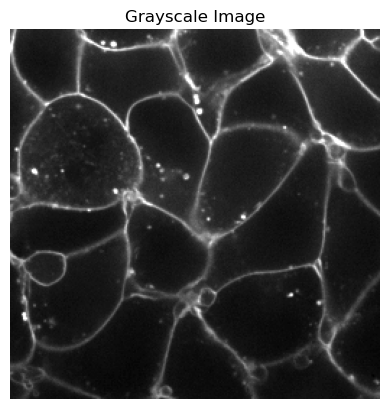

In [3]:
from skimage.color import rgb2gray
if len(image.shape) == 3:
    image_gray = rgb2gray(image)
else:
    image_gray = image
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

### Background Subtraction
Apply a white top-hat filter to subtract the background.

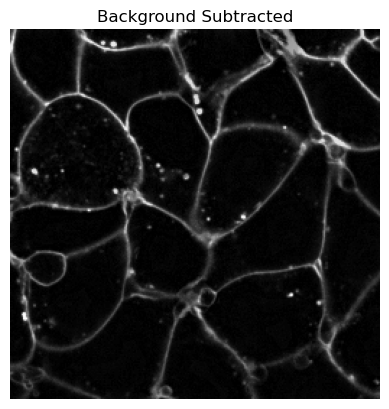

In [4]:
selem = morphology.disk(10)
image_tophat = morphology.white_tophat(image_gray, selem)
plt.imshow(image_tophat, cmap='gray')
plt.title('Background Subtracted')
plt.axis('off')
plt.show()

### Gradient Computation
Compute the gradient of the transformed image.

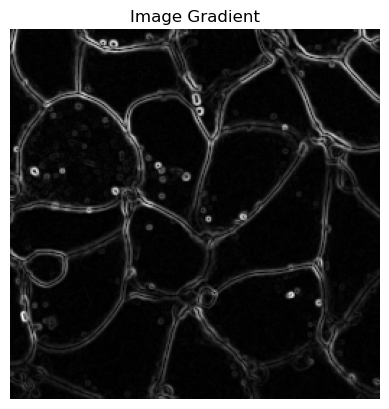

In [5]:
gradient = filters.sobel(image_tophat)
plt.imshow(gradient, cmap='gray')
plt.title('Image Gradient')
plt.axis('off')
plt.show()

### Marker Generation for Watershed
Enhance marker generation using distance transform and peak local max.

In [6]:
distance = ndi.distance_transform_edt(image_tophat)
local_maxi = feature.peak_local_max(distance, indices=False, labels=image_tophat, min_distance=5)
markers = ndi.label(local_maxi)[0]

TypeError: peak_local_max() got an unexpected keyword argument 'indices'

### Apply Watershed Segmentation
Perform the watershed algorithm to segment cells.

In [ ]:
labeled_image = segmentation.watershed(gradient, markers, mask=image_gray)
plt.imshow(color.label2rgb(labeled_image, image=image, bg_label=0), cmap='nipy_spectral')
plt.title('Segmented Cells')
plt.axis('off')
plt.show()

### Clean Up Segmented Image
Remove small objects from the labeled image.

In [ ]:
cleaned_image = morphology.remove_small_objects(labeled_image, min_size=150)
plt.imshow(color.label2rgb(cleaned_image, image=image, bg_label=0), cmap='nipy_spectral')
plt.title('Cleaned Segmented Cells')
plt.axis('off')
plt.show()

### Measure Properties of Segmented Regions
Calculate and display the area of each segmented cell.

In [ ]:
properties = measure.regionprops_table(cleaned_image, properties=['label', 'area'])
df = pd.DataFrame(properties)
print(df)